# **6. Decision Trees and Ensemble Learning**
decision trees and tree-based ensemble algorithms

## **6.1 Credit risk scoring project** 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


## **6.2 Data cleaning and preparation**

- Downloading the dataset
- Re-encoding the categorical variables
- Doing the train/validation/test split



In [2]:
import requests

url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv"
response = requests.get(url)

with open("CreditScoring.csv", "wb") as f:
    f.write(response.content)

In [3]:
import csv
with open("CreditScoring.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        print(row)
        break 

['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']


In [4]:
file_path = r"C:\Users\amirr\MLZoomCamp\ML_ZoomCamp_Projects\data\CreditScoring.csv"

In [5]:
df= pd.read_csv(file_path)

In [6]:
df.head(5)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Categorical variables are represented by numbers. For converting, we'll use the following map [extracted from Part1_CredScoring_Processing.R](https://github.com/gastonstat/CreditScoring/blob/master/Part1_CredScoring_Processing.R)  


levels(dd$Status) = c("good", "bad")

levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")  

levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")

levels(dd$Records) = c("no_rec", "yes_rec")    

levels(dd$Job) = c("fixed", "partime", "freelance", "others")  



In [8]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [9]:
df.status = df.status.map ({1:"ok", 2:"default", 0:"unknown"})

In [10]:
df.status

0            ok
1            ok
2       default
3            ok
4            ok
         ...   
4450    default
4451         ok
4452    default
4453         ok
4454         ok
Name: status, Length: 4455, dtype: object

In [11]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}

df.home = df.home.map(home_values)

In [12]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}

df.marital = df.marital.map(marital_values)

In [13]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}

df.records = df.records.map(records_values)

In [14]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}

df.job = df.job.map(job_values)

In [15]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


#### After this, all the categorical variables have strings, not numbers

In [16]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [17]:
df.income.replace(to_replace=99999999, value= np.nan).max()

np.float64(959.0)

In [18]:
for c in ['income','assets','debt']: 
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [19]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [20]:
df.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

**Investigating the "unknown" value:**  Since it occurs only once, it might be a data entry error or represent missing information. so:
- Drop it entirely: df = df[df['status'] != 'unknown']

In [21]:
df = df[df.status!= 'unknown'].reset_index(drop=True)

In [22]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [23]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_full_train, df_test = train_test_split (df, test_size=0.2, random_state=11)
df_train , df_val = train_test_split (df_full_train, test_size=0.25, random_state=11)

In [26]:
df_train = df_train.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)

In [27]:
# target variables
y_train = (df_train.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values

In [28]:
del df_train['status']
del df_val['status']
del df_test['status']
# Removes the status column (target variable) from the input datasets (df_train and df_val)
# since it should not be used as a feature during training.

In [29]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976



## **6.3 Decision tress**

- How a decision tree look like
- Training decision tree
- Overfitting
- Controlling the size of the tree


In [30]:
# A decision tree is literally just a few elif statements that's optimised 
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'default':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else: 
            return 'default'
        
    

In [31]:
xi = df_train.iloc[0].to_dict()

In [32]:
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [33]:
assess_risk(xi)

'ok'

In [34]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer # One-Hot Encoding (OHE) with DictVectorizer
from sklearn.metrics import roc_auc_score

- Fills missing values with 0 to handle missing data.
- Converts the dataframes into dictionaries of records (list of dicts), where each row is represented as a dictionary of column-value pairs. This format is required by DictVectorizer.

In [35]:
train_dicts = df_train.fillna(0).to_dict(orient= 'records')

train_dicts[:5]

In [36]:
# train the Dictionaryvectorizer
dv = DictVectorizer(sparse = False) # Converts the dictionaries into a numerical feature matrix using DictVectorize
X_train = dv.fit_transform(train_dicts)

In [37]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unknown', 'income', 'job=fixed',
       'job=freelance', 'job=others', 'job=partime', 'job=unknown',
       'marital=divorced', 'marital=married', 'marital=separated',
       'marital=single', 'marital=unknown', 'marital=widow', 'price',
       'records=no', 'records=yes', 'seniority', 'time'], dtype=object)

##### A Decision Tree Classifier is trained on the training dataset (X_train and y_train) without any restrictions on the depth of the tree.
This means the tree can grow as deep as needed to perfectly fit the training data.

In [38]:
# Train Decision tree :dt
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

##### predict_proba gives the predicted probabilities for each class. [:, 1] extracts the probability for the positive class (in this case, "default").
The ROC AUC score (Area Under the Receiver Operating Characteristic Curve) is calculated for the training data.

In [39]:
# Validation dataset
val_dicts= df_val.fillna(0).to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

In [40]:
y_pred = dt.predict_proba(X_val)[:,1]
# AUC
roc_auc_score(y_val, y_pred)

np.float64(0.6707151679542758)

The AUC on the validation set is much lower, indicating the model struggles to generalize to unseen data.
The difference between training and validation AUC highlights overfitting.

In [41]:
y_pred = dt.predict_proba(X_train)[:,1]
# AUC
roc_auc_score(y_train, y_pred)

np.float64(1.0)

#### We have overfiting here
Model memorize the data but fails to generalize.
The AUC score is 1.0, meaning the model perfectly separates the classes in the training data. This is a sign of overfitting because the model has memorized the training data.

### **Why Overfitting Happens?**

A decision tree with unlimited depth:
- Splits the data into increasingly smaller subsets.
- Can create overly specific rules for individual training examples, leading to perfect predictions on the training set.
- Fails to generalize to unseen data because it cannot capture the underlying patterns of the data; it only memorizes the training points.



### Restricting Tree Depth: max_depth=2
Setting max_depth=2 restricts the tree to a maximum of 2 levels. This forces the model to make only a limited number of splits, reducing its complexity.

In [42]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


The training AUC is now **0.776** , which is much lower than the previous perfect score (1.0). This indicates the model is no longer memorizing the training data but instead is focusing on broader patterns.

The validation AUC has improved to **0.739**, compared to **0.656** from the unrestricted tree. This shows better generalization to unseen data.

In [43]:
from sklearn.tree import export_text

In [44]:
print(export_text(dt, feature_names= dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1




## **6.4 Decision tree learning algorithm**

- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [45]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets','debt' 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [46]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [47]:
from IPython.display import display

In [48]:
# potential treshholds
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [49]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts())
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    3
ok         1
Name: count, dtype: int64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [50]:
for T in Ts:
    print(T)
    df_left= df_example[df_example.assets <=T]
    df_right= df_example[df_example.assets >T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64


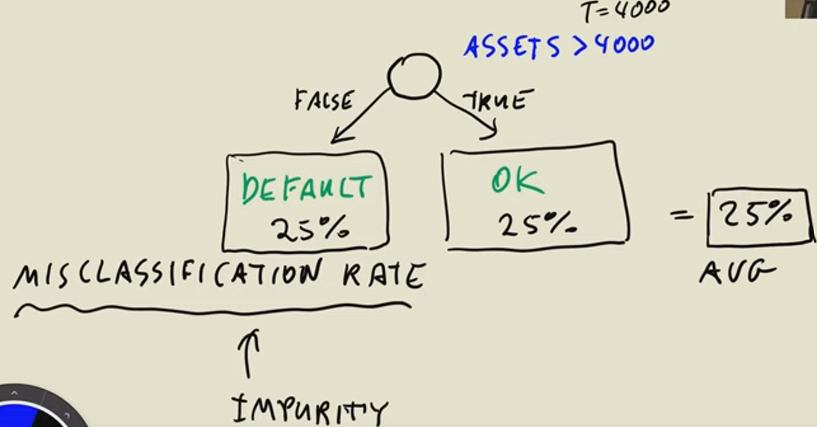

In [51]:
from IPython.display import Image
Image("C:\\Users\\amirr\\MLZoomCamp\\ML_ZoomCamp_Projects\\Screenshots\\Tree.png")